In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import os

# Correct paths to benign and malignant folders
dataset_path = '/content/drive/MyDrive/melanoma_cancer_dataset'

# Paths to benign and malignant folders
benign_folder_path = os.path.join(dataset_path, 'benign')
malignant_folder_path = os.path.join(dataset_path, 'malignant')

# Verify the contents of both folders
print("Benign folder contents:", os.listdir(benign_folder_path))
if os.path.exists(malignant_folder_path):
    print("Malignant folder contents:", os.listdir(malignant_folder_path))
else:
    print(f"Malignant folder not found at: {malignant_folder_path}")

Benign folder contents: ['melanoma_74.jpg', 'melanoma_104.jpg', 'melanoma_63.jpg', 'melanoma_8.jpg', 'melanoma_44.jpg', 'melanoma_79.jpg', 'melanoma_14.jpg', 'melanoma_25.jpg', 'melanoma_71.jpg', 'melanoma_22.jpg', 'melanoma_23.jpg', 'melanoma_26.jpg', 'melanoma_68.jpg', 'melanoma_55.jpg', 'melanoma_98.jpg', 'melanoma_65.jpg', 'melanoma_86.jpg', 'melanoma_76.jpg', 'melanoma_59.jpg', 'melanoma_3.jpg', 'melanoma_18.jpg', 'melanoma_38.jpg', 'melanoma_21.jpg', 'melanoma_4.jpg', 'melanoma_70.jpg', 'melanoma_15.jpg', 'melanoma_9.jpg', 'melanoma_78.jpg', 'melanoma_57.jpg', 'melanoma_32.jpg', 'melanoma_99.jpg', 'melanoma_36.jpg', 'melanoma_34.jpg', 'melanoma_29.jpg', 'melanoma_27.jpg', 'melanoma_17.jpg', 'melanoma_72.jpg', 'melanoma_64.jpg', 'melanoma_12.jpg', 'melanoma_54.jpg', 'melanoma_88.jpg', 'melanoma_60.jpg', 'melanoma_19.jpg', 'melanoma_87.jpg', 'melanoma_28.jpg', 'melanoma_107.jpg', 'melanoma_62.jpg', 'melanoma_45.jpg', 'melanoma_0.jpg', 'melanoma_24.jpg', 'melanoma_6.jpg', 'melanoma_

In [6]:
# List the contents of the melanoma_cancer_dataset folder to verify folder names
dataset_path = '/content/drive/MyDrive/melanoma_cancer_dataset'
print("Contents of the melanoma_cancer_dataset folder:", os.listdir(dataset_path))


Contents of the melanoma_cancer_dataset folder: ['malignat', 'benign']


In [7]:
# Correct the folder name for 'malignant'
malignant_folder_path = os.path.join(dataset_path, 'malignat')

# Verify the contents of both folders
print("Benign folder contents:", os.listdir(benign_folder_path))
print("Malignant folder contents:", os.listdir(malignant_folder_path))


Benign folder contents: ['melanoma_74.jpg', 'melanoma_104.jpg', 'melanoma_63.jpg', 'melanoma_8.jpg', 'melanoma_44.jpg', 'melanoma_79.jpg', 'melanoma_14.jpg', 'melanoma_25.jpg', 'melanoma_71.jpg', 'melanoma_22.jpg', 'melanoma_23.jpg', 'melanoma_26.jpg', 'melanoma_68.jpg', 'melanoma_55.jpg', 'melanoma_98.jpg', 'melanoma_65.jpg', 'melanoma_86.jpg', 'melanoma_76.jpg', 'melanoma_59.jpg', 'melanoma_3.jpg', 'melanoma_18.jpg', 'melanoma_38.jpg', 'melanoma_21.jpg', 'melanoma_4.jpg', 'melanoma_70.jpg', 'melanoma_15.jpg', 'melanoma_9.jpg', 'melanoma_78.jpg', 'melanoma_57.jpg', 'melanoma_32.jpg', 'melanoma_99.jpg', 'melanoma_36.jpg', 'melanoma_34.jpg', 'melanoma_29.jpg', 'melanoma_27.jpg', 'melanoma_17.jpg', 'melanoma_72.jpg', 'melanoma_64.jpg', 'melanoma_12.jpg', 'melanoma_54.jpg', 'melanoma_88.jpg', 'melanoma_60.jpg', 'melanoma_19.jpg', 'melanoma_87.jpg', 'melanoma_28.jpg', 'melanoma_107.jpg', 'melanoma_62.jpg', 'melanoma_45.jpg', 'melanoma_0.jpg', 'melanoma_24.jpg', 'melanoma_6.jpg', 'melanoma_

Resized benign images shape: (1001, 224, 224, 3)
Resized malignant images shape: (1000, 224, 224, 3)


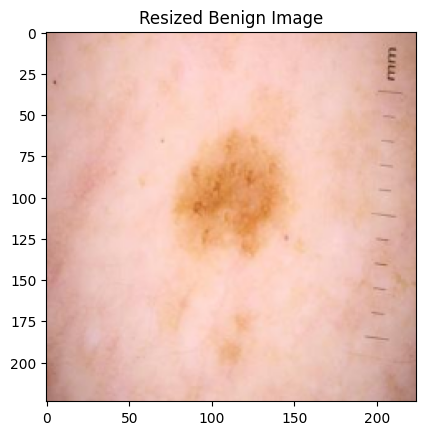

In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the target size for resizing images (224x224 is common for CNN models)
target_size = (224, 224)

# Path to your benign and malignant image folders
benign_folder_path = '/content/drive/MyDrive/melanoma_cancer_dataset/benign'
malignant_folder_path = '/content/drive/MyDrive/melanoma_cancer_dataset/malignat'  # Corrected folder name

# Function to resize images in a folder
def resize_images(folder_path):
    resized_images = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            img_resized = cv2.resize(img, target_size)
            resized_images.append(img_resized)
    return np.array(resized_images)

# Resize images in both folders
benign_resized = resize_images(benign_folder_path)
malignant_resized = resize_images(malignant_folder_path)

# Check the shape of resized images
print(f"Resized benign images shape: {benign_resized.shape}")
print(f"Resized malignant images shape: {malignant_resized.shape}")

# Display a sample image to check if resizing worked
plt.imshow(cv2.cvtColor(benign_resized[0], cv2.COLOR_BGR2RGB))
plt.title("Resized Benign Image")
plt.show()


Enhanced benign images shape: (1001, 224, 224, 3)
Enhanced malignant images shape: (1000, 224, 224, 3)


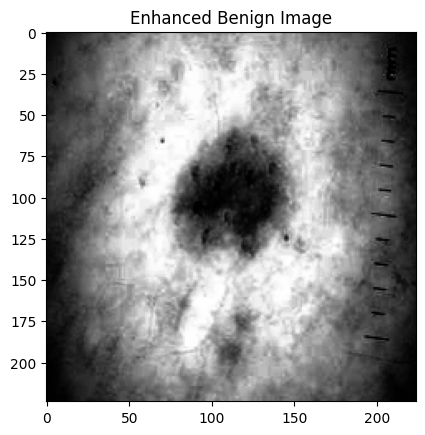

In [9]:
# Function for contrast enhancement and normalization
def enhance_and_normalize(images):
    enhanced_images = []
    for img in images:
        # Convert the image to grayscale (for contrast enhancement)
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply histogram equalization to enhance contrast
        equalized_img = cv2.equalizeHist(gray_img)

        # Convert back to BGR (3 channels) to match the input format
        enhanced_img = cv2.cvtColor(equalized_img, cv2.COLOR_GRAY2BGR)

        # Normalize the image: convert to float32 and scale pixel values to [0, 1]
        normalized_img = enhanced_img.astype('float32') / 255.0

        enhanced_images.append(normalized_img)

    return np.array(enhanced_images)

# Apply contrast enhancement and normalization to both benign and malignant images
benign_enhanced = enhance_and_normalize(benign_resized)
malignant_enhanced = enhance_and_normalize(malignant_resized)

# Check the shape of the enhanced images
print(f"Enhanced benign images shape: {benign_enhanced.shape}")
print(f"Enhanced malignant images shape: {malignant_enhanced.shape}")

# Display a sample enhanced benign image
plt.imshow(benign_enhanced[0])
plt.title("Enhanced Benign Image")
plt.show()


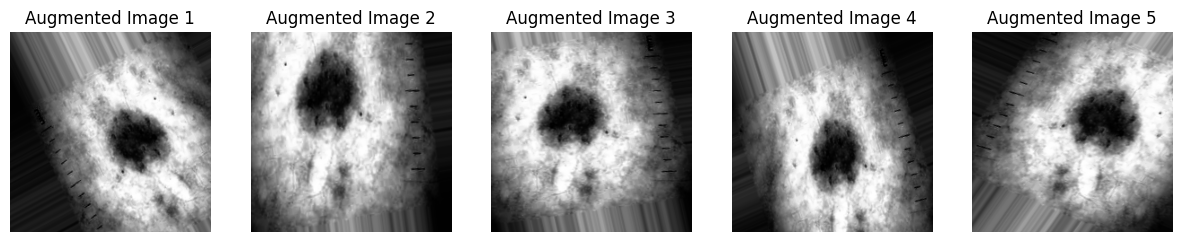

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator instance for data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,        # Random rotation
    width_shift_range=0.2,    # Random width shift
    height_shift_range=0.2,   # Random height shift
    shear_range=0.2,          # Shear transformation
    zoom_range=0.2,           # Zoom in/out
    horizontal_flip=True,     # Random horizontal flip
    fill_mode='nearest'       # Fill missing pixels after transformation
)

# Choose a sample image to augment
sample_image = benign_enhanced[0]  # Take the first image from the benign dataset

# Reshape image to match the expected format (1, height, width, channels)
sample_image = np.expand_dims(sample_image, axis=0)

# Generate augmented images
augmented_images = datagen.flow(sample_image, batch_size=1)

# Display a few augmented images
fig, axes = plt.subplots(1, 5, figsize=(15, 15))
for i in range(5):
    augmented_image = next(augmented_images)[0].astype('float32')
    axes[i].imshow(augmented_image)
    axes[i].axis('off')
    axes[i].set_title(f"Augmented Image {i+1}")
plt.show()


In [12]:
# If you want to trim the larger dataset to match the smaller one
benign_enhanced = benign_enhanced[:1000]  # Trim to match malignant dataset size



In [14]:
from sklearn.model_selection import train_test_split

# Now concatenate the images and labels
all_images = np.concatenate((benign_enhanced, malignant_enhanced), axis=0)  # Combine benign and malignant images using np.concatenate
all_labels = [0] * len(benign_enhanced) + [1] * len(malignant_enhanced)  # Labels (0 for benign, 1 for malignant)

# Proceed with Train/Validation/Test Split
X_train, X_temp, y_train, y_temp = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the number of images in each set
print(f"Training set: {len(X_train)} images")
print(f"Validation set: {len(X_val)} images")
print(f"Test set: {len(X_test)} images")

Training set: 1600 images
Validation set: 200 images
Test set: 200 images


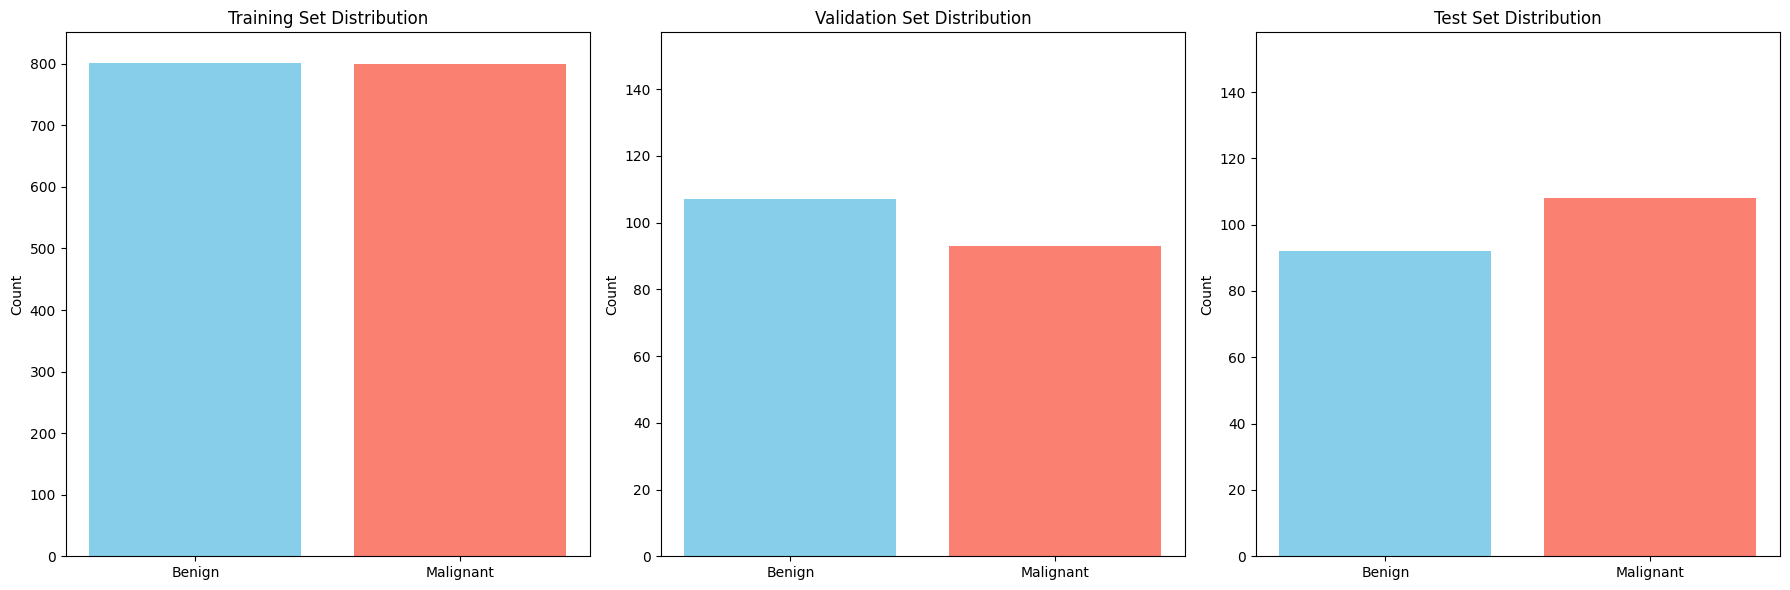

In [17]:
import matplotlib.pyplot as plt

# Count the occurrences of benign (0) and malignant (1) labels
train_labels_count = [sum(y_train == 0), sum(y_train == 1)]
val_labels_count = [sum(y_val == 0), sum(y_val == 1)]
test_labels_count = [sum(y_test == 0), sum(y_test == 1)]

# Labels
labels = ['Benign', 'Malignant']

# Plot histograms for Train, Validation, and Test splits
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Training set histogram
axes[0].bar(labels, train_labels_count, color=['skyblue', 'salmon'])
axes[0].set_title("Training Set Distribution")
axes[0].set_ylabel("Count")
axes[0].set_ylim([0, max(train_labels_count) + 50])

# Validation set histogram
axes[1].bar(labels, val_labels_count, color=['skyblue', 'salmon'])
axes[1].set_title("Validation Set Distribution")
axes[1].set_ylabel("Count")
axes[1].set_ylim([0, max(val_labels_count) + 50])

# Test set histogram
axes[2].bar(labels, test_labels_count, color=['skyblue', 'salmon'])
axes[2].set_title("Test Set Distribution")
axes[2].set_ylabel("Count")
axes[2].set_ylim([0, max(test_labels_count) + 50])

plt.tight_layout()
plt.show()


In [18]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Convert labels into a numpy array
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# If needed, we can perform one-hot encoding (optional)
from keras.utils import to_categorical

# One-hot encode the labels
y_train_encoded = to_categorical(y_train, num_classes=2)
y_val_encoded = to_categorical(y_val, num_classes=2)
y_test_encoded = to_categorical(y_test, num_classes=2)

# Check the shape of the encoded labels
print(f"Encoded Training labels shape: {y_train_encoded.shape}")
print(f"Encoded Validation labels shape: {y_val_encoded.shape}")
print(f"Encoded Test labels shape: {y_test_encoded.shape}")


Encoded Training labels shape: (1600, 2)
Encoded Validation labels shape: (200, 2)
Encoded Test labels shape: (200, 2)


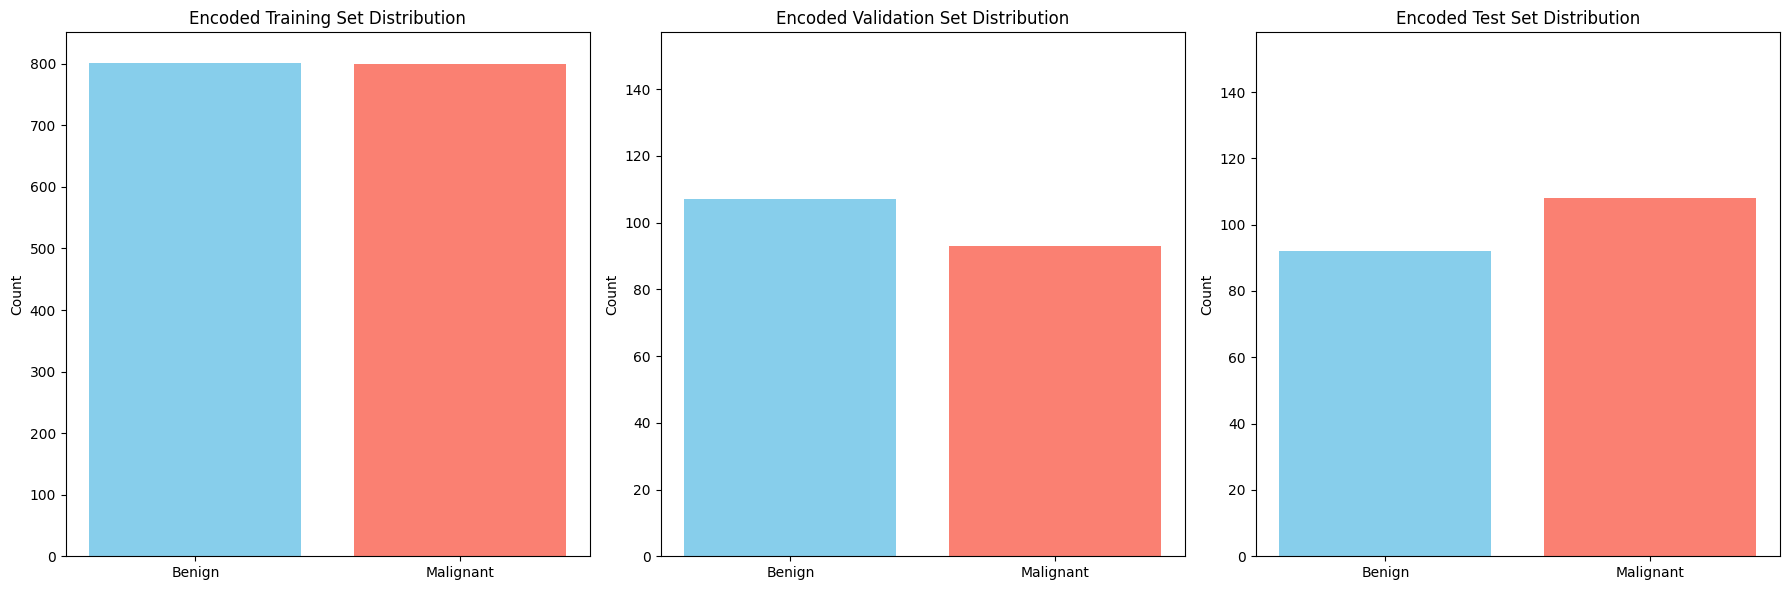

In [19]:
# Count the occurrences of encoded labels (0 for benign, 1 for malignant)
train_encoded_count = [sum(y_train_encoded[:, 0] == 1), sum(y_train_encoded[:, 1] == 1)]
val_encoded_count = [sum(y_val_encoded[:, 0] == 1), sum(y_val_encoded[:, 1] == 1)]
test_encoded_count = [sum(y_test_encoded[:, 0] == 1), sum(y_test_encoded[:, 1] == 1)]

# Plot histograms for encoded labels
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Training set encoded label histogram
axes[0].bar(labels, train_encoded_count, color=['skyblue', 'salmon'])
axes[0].set_title("Encoded Training Set Distribution")
axes[0].set_ylabel("Count")
axes[0].set_ylim([0, max(train_encoded_count) + 50])

# Validation set encoded label histogram
axes[1].bar(labels, val_encoded_count, color=['skyblue', 'salmon'])
axes[1].set_title("Encoded Validation Set Distribution")
axes[1].set_ylabel("Count")
axes[1].set_ylim([0, max(val_encoded_count) + 50])

# Test set encoded label histogram
axes[2].bar(labels, test_encoded_count, color=['skyblue', 'salmon'])
axes[2].set_title("Encoded Test Set Distribution")
axes[2].set_ylabel("Count")
axes[2].set_ylim([0, max(test_encoded_count) + 50])

plt.tight_layout()
plt.show()


In [21]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
import os
import numpy as np

# Load the pre-trained VGG16 model (without the top layers for feature extraction)
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Function to extract features
def extract_features(image_paths):
    features = []
    for img_path in image_paths:
        # Load and preprocess image
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = preprocess_input(img_array)  # Preprocess image for VGG16

        # Extract features using VGG16
        feature = vgg_model.predict(np.expand_dims(img_array, axis=0))
        features.append(feature.flatten())  # Flatten the features to 1D

    return np.array(features)

# Extract features from the benign and malignant images
benign_features = extract_features([os.path.join(benign_folder_path, img) for img in os.listdir(benign_folder_path)])
malignant_features = extract_features([os.path.join(malignant_folder_path, img) for img in os.listdir(malignant_folder_path)])

# Combine the features from both classes
all_features = np.concatenate([benign_features, malignant_features], axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 839ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 873ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns


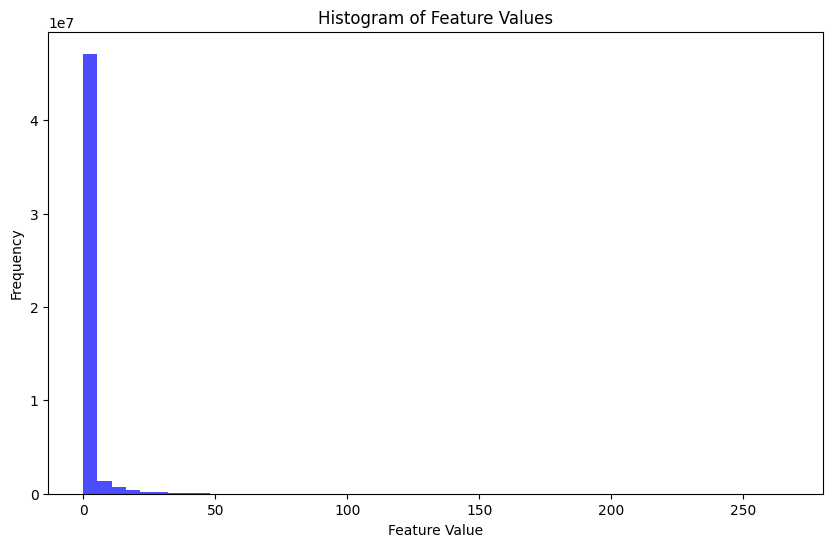

In [23]:
# Flatten the features and plot the histogram
all_features_flattened = all_features.flatten()

plt.figure(figsize=(10, 6))
plt.hist(all_features_flattened, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Feature Values')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.show()


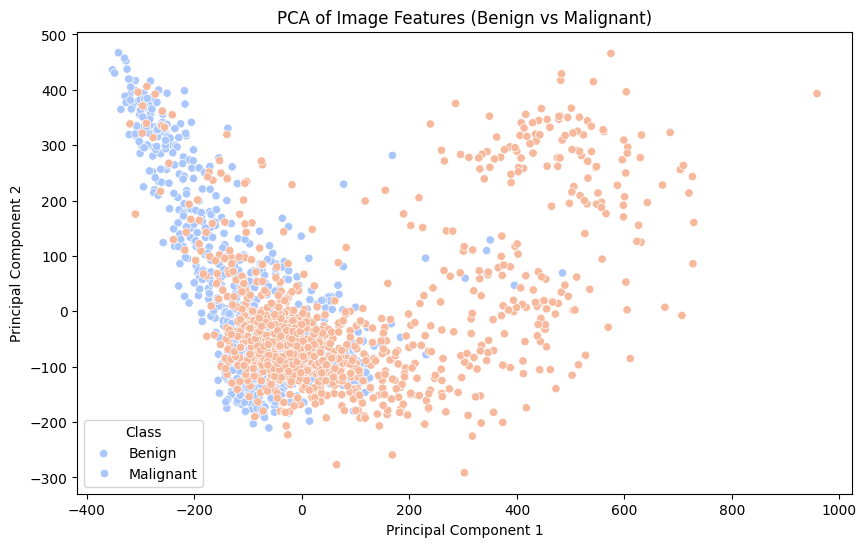

In [24]:
# Perform PCA to reduce the feature dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(all_features)

# Create a scatter plot to visualize the two-dimensional PCA result
benign_labels = [0] * len(benign_features)
malignant_labels = [1] * len(malignant_features)
labels = benign_labels + malignant_labels  # 0 for benign, 1 for malignant

# Plot the PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=labels, palette="coolwarm", marker='o')
plt.title('PCA of Image Features (Benign vs Malignant)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class', labels=['Benign', 'Malignant'])
plt.show()


In [25]:
from sklearn.preprocessing import LabelEncoder

# Create the LabelEncoder instance
label_encoder = LabelEncoder()

# Labels: 0 for benign, 1 for malignant
labels = ['benign'] * len(benign_features) + ['malignant'] * len(malignant_features)

# Fit and transform the labels into numerical format
encoded_labels = label_encoder.fit_transform(labels)

# Check the encoded labels (will be 0 for benign and 1 for malignant)
print(encoded_labels[:10])  # Print the first 10 encoded labels


[0 0 0 0 0 0 0 0 0 0]


In [26]:
# Combine features and labels into one dataset
final_dataset = np.column_stack((all_features, encoded_labels))

# Check the shape of the final dataset
print(final_dataset.shape)  # It should show (number_of_images, feature_size + 1)


(2001, 25089)


In [27]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and labels (y)
X = final_dataset[:, :-1]  # All columns except the last one (features)
y = final_dataset[:, -1]   # Last column is the labels

# Split the data into Training (70%), Validation (15%), and Test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the shapes of the splits
print(f"Training set: {X_train.shape[0]} images")
print(f"Validation set: {X_val.shape[0]} images")
print(f"Test set: {X_test.shape[0]} images")


Training set: 1400 images
Validation set: 300 images
Test set: 301 images


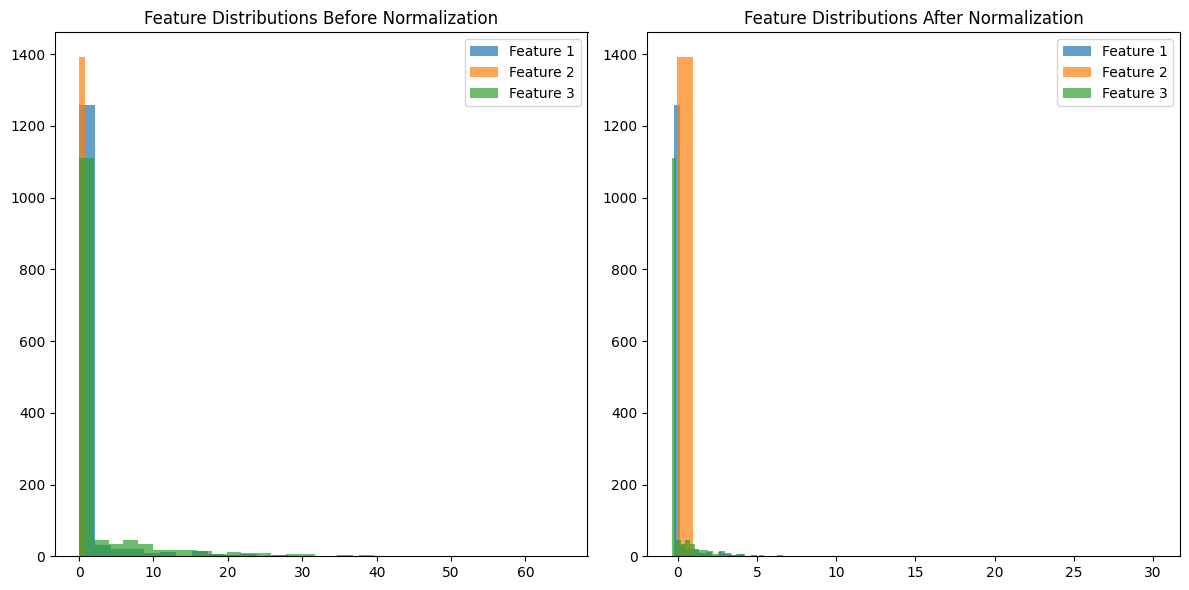

In [30]:
import matplotlib.pyplot as plt

# Plot histogram of a few features before and after normalization
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Before normalization (showing the first 3 features for demonstration)
axes[0].hist(X_train[:, 0], bins=30, alpha=0.7, label='Feature 1')
axes[0].hist(X_train[:, 1], bins=30, alpha=0.7, label='Feature 2')
axes[0].hist(X_train[:, 2], bins=30, alpha=0.7, label='Feature 3')
axes[0].set_title('Feature Distributions Before Normalization')
axes[0].legend()

# After normalization (scaled data)
axes[1].hist(X_train_scaled[:, 0], bins=30, alpha=0.7, label='Feature 1')
axes[1].hist(X_train_scaled[:, 1], bins=30, alpha=0.7, label='Feature 2')
axes[1].hist(X_train_scaled[:, 2], bins=30, alpha=0.7, label='Feature 3')
axes[1].set_title('Feature Distributions After Normalization')
axes[1].legend()

plt.tight_layout()
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training, validation, and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Check the shapes of the scaled data
print(f"Scaled Training set shape: {X_train_scaled.shape}")
print(f"Scaled Validation set shape: {X_val_scaled.shape}")
print(f"Scaled Test set shape: {X_test_scaled.shape}")

Scaled Training set shape: (1400, 25088)
Scaled Validation set shape: (300, 25088)
Scaled Test set shape: (301, 25088)


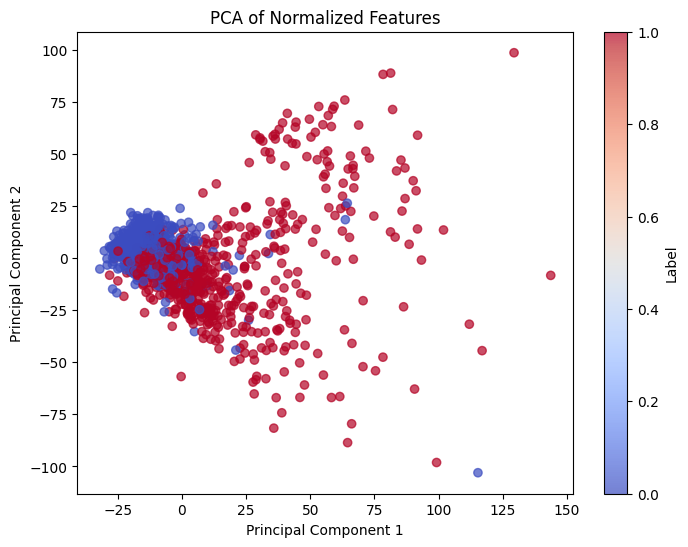

In [31]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
plt.title('PCA of Normalized Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Label')
plt.show()


In [1]:
import os
import shutil
from google.colab import files

# Specify the folder containing the processed images
processed_images_folder = '/content/processed_images/'  # Change to your folder's path

# Create the folder if it doesn't exist
os.makedirs(processed_images_folder, exist_ok=True)

# Example: Save a sample image to processed_images_folder
# Here, you should replace this with your actual image-saving code
# For example, saving the processed images to the folder
# This is just an example - replace with your actual saving mechanism
# from PIL import Image
# img = Image.open('/path/to/image.jpg')
# img.save(os.path.join(processed_images_folder, 'image1.jpg'))

# Check if the folder contains images (you can also use your own code to save images)
print("Images in processed folder:", os.listdir(processed_images_folder))

# Path to the output zip file
zip_file = '/content/processed_images.zip'

# Compress the folder into a zip file
shutil.make_archive(zip_file.replace('.zip', ''), 'zip', processed_images_folder)

# Download the zip file to your local machine
files.download(zip_file)



Images in processed folder: []


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>